In [3]:
#pulling in the data
import pandas as pd;
df = pd.read_json("hf://datasets/toughdata/quora-question-answer-dataset/Quora-QuAD.jsonl", lines=True)
df.head()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


,question,answer
0,Why whenever I get in the shower my girlfriend...,Isn’t it awful? You would swear that there was...
1,"What is a proxy, and how can I use one?",A proxy server is a system or router that prov...
2,"What song has the lyrics ""someone left the cak...",MacArthur's Park\n
3,I am the owner of an adult website called http...,Don't let apps that are liers put adds on your...
4,Does the Bible mention anything about a place ...,St. John in the book of Revelation mentions an...


In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56402 entries, 0 to 56401
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   question  56402 non-null  object
 1   answer    56402 non-null  object
dtypes: object(2)
memory usage: 881.4+ KB
None


Missing values

In [3]:
print(df.isnull().sum())

question    0
answer      0
dtype: int64


Analyze Data Distribution:

In [4]:
print(df.describe())

                                                 question answer
count                                               56402  56402
unique                                               3234  54726
top     Would Hillary Clinton have made a better Presi...   No\n
freq                                                  106     89


Data Cleaning


Removing Irrelevant Information:

In [5]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)  # or use df.fillna() to handle missing values

Text Processing

Tokenization

In [7]:
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize

df['tokenized_question'] = df['question'].apply(word_tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Stop Word removal

In [9]:
import nltk
nltk.download('stopwords') # Download the stopwords resource

from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [word for word in tokens if word.lower() not in stop_words]

df['filtered_question'] = df['tokenized_question'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Stemming/Lemmatization

In [11]:
import nltk
nltk.download('wordnet')

from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def stem_words(tokens):
    return [stemmer.stem(word) for word in tokens]

def lemmatize_words(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

df['stemmed_question'] = df['filtered_question'].apply(stem_words)
df['lemmatized_question'] = df['filtered_question'].apply(lemmatize_words)

[nltk_data] Downloading package wordnet to /root/nltk_data...


Visualization


Distribution of the length of questions

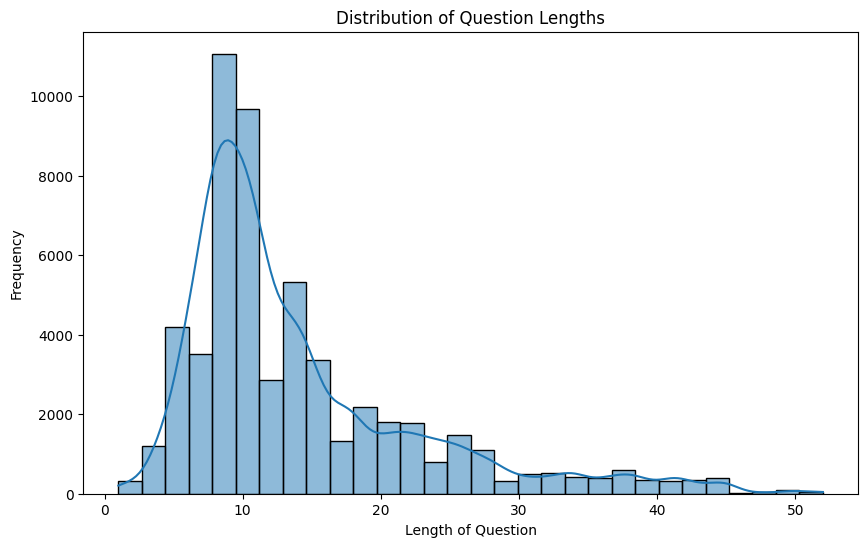

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

df['question_length'] = df['question'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 6))
sns.histplot(df['question_length'], bins=30, kde=True)
plt.title('Distribution of Question Lengths')
plt.xlabel('Length of Question')
plt.ylabel('Frequency')
plt.show()


Word Cloud

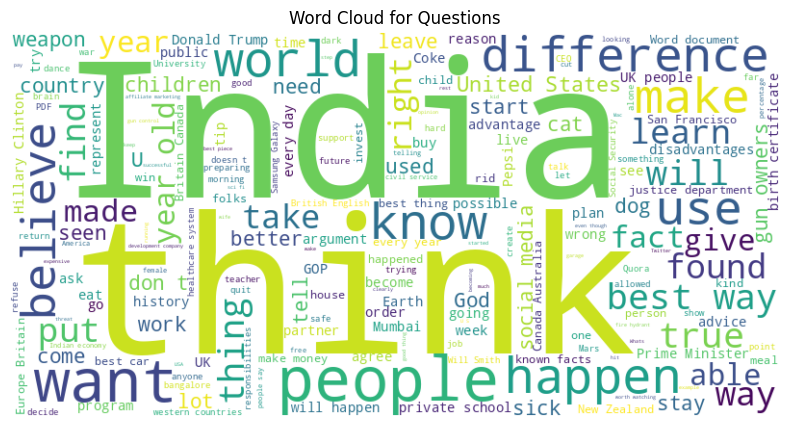

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all questions into a single string
text = ' '.join(df['question'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Questions')
plt.show()


Most Frequent N-Grams

In [6]:
import seaborn as sns

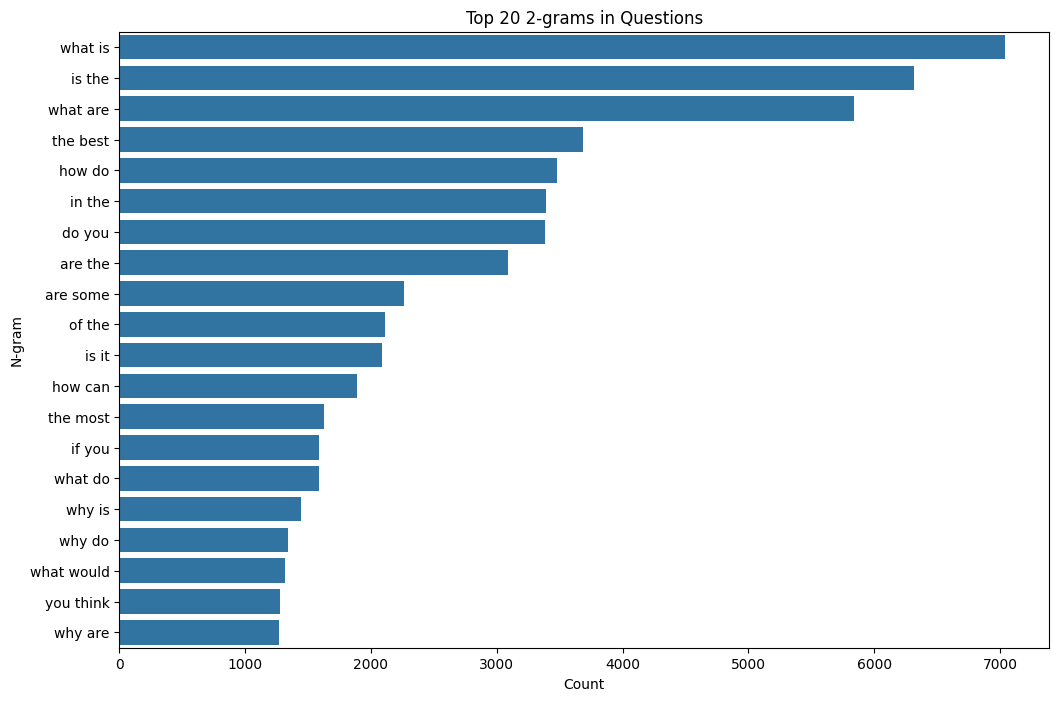

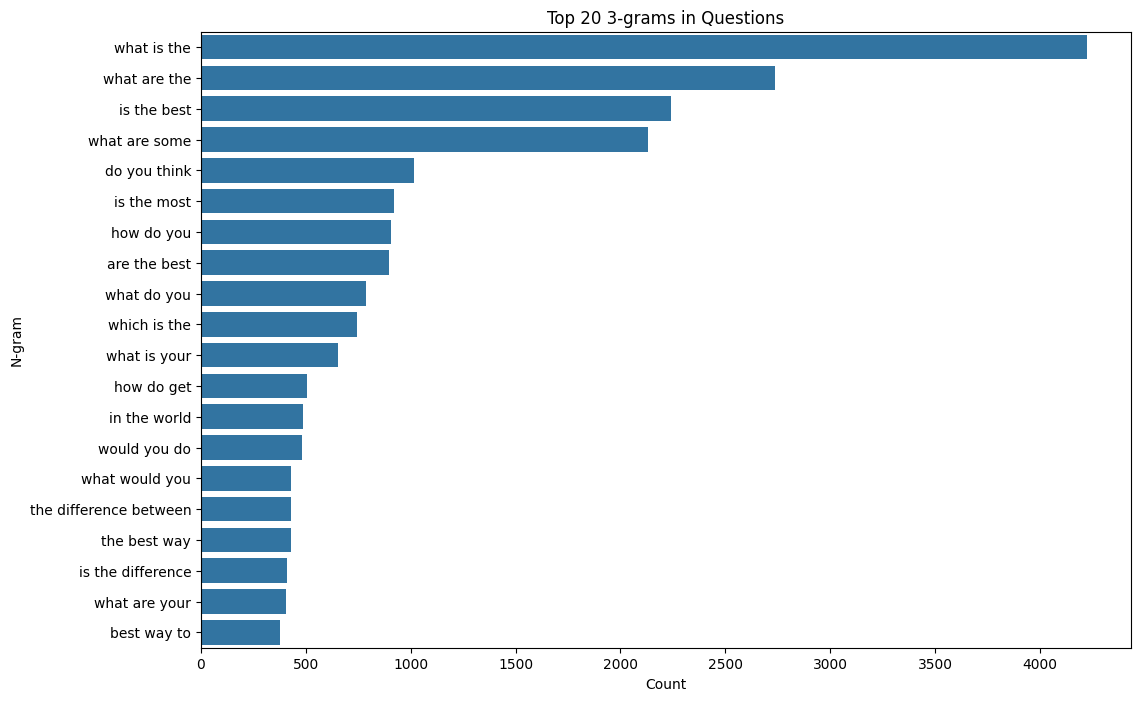

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

def plot_ngrams(text, n=2, top_n=20):
    vectorizer = CountVectorizer(ngram_range=(n, n))
    X = vectorizer.fit_transform(text)
    ngrams = vectorizer.get_feature_names_out()
    counts = X.sum(axis=0).A1
    ngram_counts = dict(zip(ngrams, counts))
    sorted_ngrams = sorted(ngram_counts.items(), key=lambda x: x[1], reverse=True)[:top_n]

    # Convert to DataFrame for visualization
    ngram_df = pd.DataFrame(sorted_ngrams, columns=['N-gram', 'Count'])
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Count', y='N-gram', data=ngram_df)
    plt.title(f'Top {top_n} {n}-grams in Questions')
    plt.xlabel('Count')
    plt.ylabel('N-gram')
    plt.show()

plot_ngrams(df['question'], n=2)  # For bigrams
plot_ngrams(df['question'], n=3)  # For trigrams
